### 1. A/B Testing

In [13]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [14]:
births = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [15]:
somking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')

In [16]:
somking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


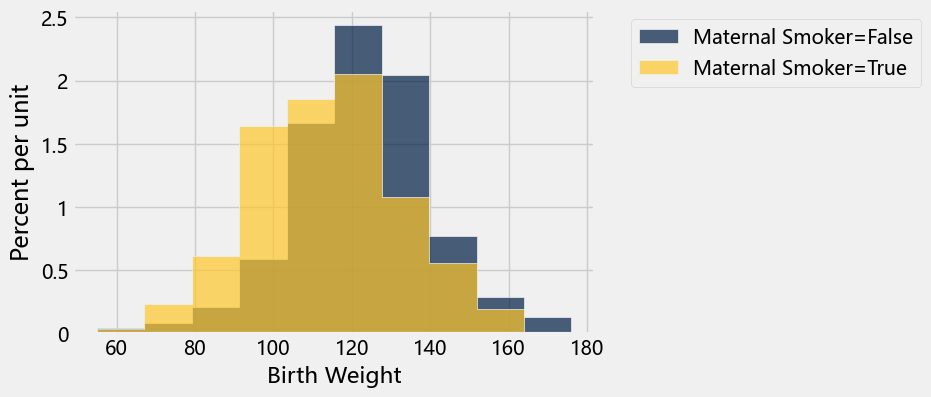

In [17]:
somking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [18]:
means_tabel = somking_and_birthweight.group('Maternal Smoker', np.average)
means_tabel

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [19]:
means = means_tabel.column(1)
observation_difference = means.item(1) - means.item(0)
observation_difference

-9.266142572024918

In [20]:
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean birth weights of the two groups"""
    reduced = table.select('Birth Weight', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [21]:
difference_of_means(births, 'Maternal Smoker')

-9.266142572024918

In [22]:
shuffled_labels = somking_and_birthweight.sample(with_replacement=False).column(0)
original_and_shuffled = somking_and_birthweight.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,120,False
False,113,False
True,128,False
True,108,False
False,136,False
False,138,False
False,132,True
False,120,False
True,143,True
False,140,False


In [23]:
shuffled_only = original_and_shuffled.select('Birth Weight', 'Shuffled Label')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means

Shuffled Label,Birth Weight average
False,119.278
True,119.749


In [24]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

0.47113365936895946

In [34]:
observed_difference = difference_of_means(original_and_shuffled, 'Maternal Smoker')

In [26]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of birth weights and shuffled labels
    shuffled_table = births.select('Birth Weight').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')  

In [31]:
one_simulated_difference_of_means()

-0.6020415314532954

In [32]:
difference = make_array()

reptitions = 5000
for i in np.arange(reptitions):
    new_difference = one_simulated_difference_of_means()
    difference = np.append(difference, new_difference)

Observed Difference:  -9.266142572024918


Text(0.5, 1.0, 'Prediction Under the Null Hypothesis')

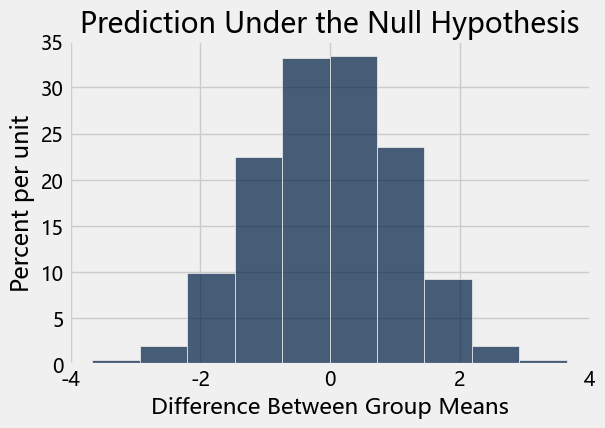

In [36]:
Table().with_column("Difference Between Group Means", difference).hist()
print('Observed Difference: ', observed_difference)
plots.title('Prediction Under the Null Hypothesis')

In [38]:
empirical_p = np.count_nonzero(difference <= observed_difference) / reptitions
print('Empirical P-value: ', empirical_p)

Empirical P-value:  0.0


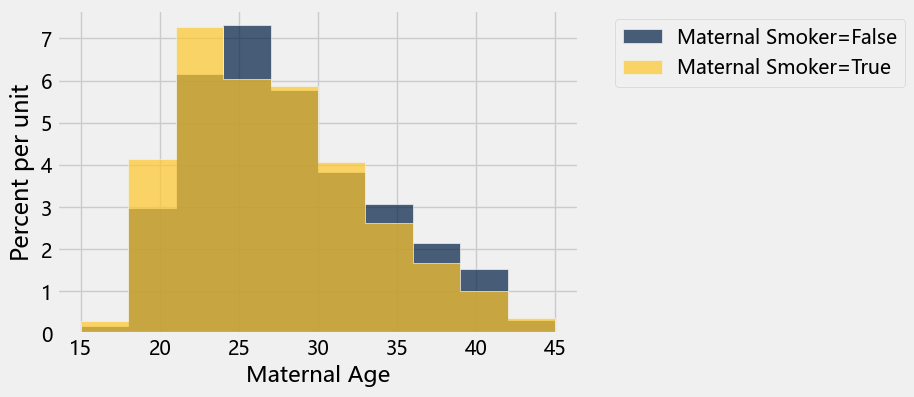

In [39]:
smoking_and_age = births.select('Maternal Smoker', 'Maternal Age')
smoking_and_age.hist('Maternal Age', group='Maternal Smoker')

In [40]:
def difference_of_means(table, group_label):
    reduced = table.select('Maternal Age', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [41]:
observed_age_difference = difference_of_means(births, 'Maternal Smoker')
observed_age_difference

-0.8076725017901509

In [43]:
def one_simulated_difference_of_means_age():
    """Returns: Difference between mean ages
    of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of ages and shuffled labels
    shuffled_table = births.select('Maternal Age').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [44]:
age_difference = make_array()

reptitions = 5000
for i in np.arange(reptitions):
    new_difference = one_simulated_difference_of_means_age()
    age_difference = np.append(age_difference, new_difference)

Observed Difference:  -0.8076725017901509


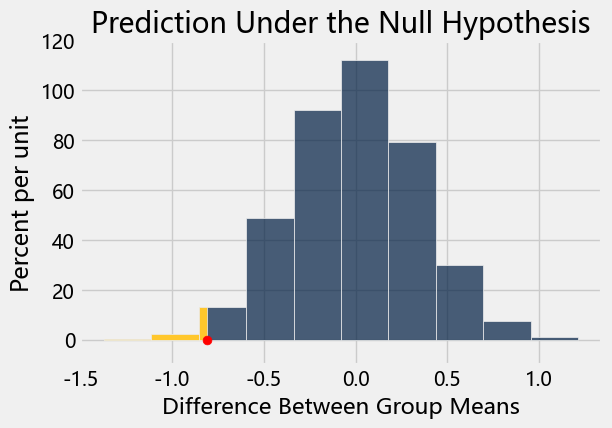

In [47]:
Table().with_column("Difference Between Group Means", age_difference).hist(right_end = observed_age_difference)
print('Observed Difference: ', observed_age_difference)
plots.title('Prediction Under the Null Hypothesis')
plots.ylim(-0.1, 1.2)
plots.scatter(observed_age_difference, 0, color='red', s=40, zorder=3)

In [48]:
empirical_p = np.count_nonzero(age_difference <= observed_age_difference) / reptitions
print('Empirical P-value: ', empirical_p)

Empirical P-value:  0.0094


### 2. Causality

In [51]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [52]:
bta = Table().read_table('https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/bta.csv')
bta

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [53]:
bta.group('Group', sum)

Group,Result sum
Control,2
Treatment,9


In [54]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [55]:
observed_outcomes = Table().read_table('https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/observed_outcomes.csv')
observed_outcomes

Group,Outcome if assigned treatment,Outcome if assigned control
Control,Unknown,1
Control,Unknown,1
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0


In [56]:
observed_proportions = bta.group('Group', np.average).column(1)
observed_distance = abs(observed_proportions.item(0) - observed_proportions.item(1))
observed_distance

0.475

In [57]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [58]:
distance(bta, 'Group')

0.475

In [59]:
shuffled_labels = bta.sample(with_replacement=False).column('Group')

In [60]:
bta_with_shuffled_labels = bta.with_column('Shuffled Label', shuffled_labels)
bta_with_shuffled_labels

Group,Result,Shuffled Label
Control,1,Treatment
Control,1,Control
Control,0,Treatment
Control,0,Treatment
Control,0,Control
Control,0,Treatment
Control,0,Treatment
Control,0,Treatment
Control,0,Control
Control,0,Control


In [61]:
distance(bta_with_shuffled_labels, 'Shuffled Label')

0.08750000000000002

In [62]:
distance(bta_with_shuffled_labels, 'Group')

0.475

In [63]:
def one_simulated_distance():
    shuffled_labels = bta.sample(with_replacement=False).column('Group')
    shuffled_table = bta.select('Result').with_column('Shuffled Label', shuffled_labels)
    return distance(shuffled_table, 'Shuffled Label')

In [65]:
distances = make_array()

repetitions = 20000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance()
    distances = np.append(distances, new_distance)

Observed Distance:  0.475


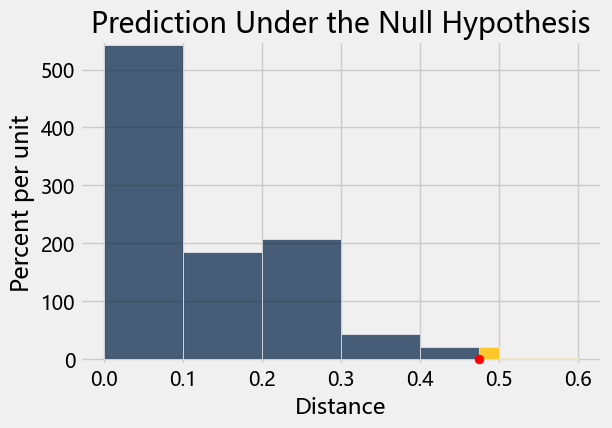

In [66]:
Table().with_column('Distance', distances).hist(bins = np.arange(0, 0.7, 0.1), left_end = observed_distance)
plots.ylim(-0.1, 5.5)
plots.scatter(observed_distance, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Distance: ', observed_distance)

In [67]:
empirical_p = np.count_nonzero(distances >= observed_distance) / repetitions
print('Empirical P-value: ', empirical_p)

Empirical P-value:  0.0094


### 3. Deflategate

In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [5]:
football = Table.read_table('https://github.com/Matthew-HMS/datascience_material/raw/main/assets/data/deflategate.csv')
football

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [6]:
football = football.with_column('Combined', (football.column(1)+football.column(2))/2).drop(1, 2)
football

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [7]:
np.ones(11)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [8]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([ 12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,
        12.5,  12.5,  13. ,  13. ,  13. ,  13. ])

In [10]:
drop = start - football.column(1)
football = football.with_column('Pressure Drop', drop)
football.show()

Team,Combined,Pressure Drop
Patriots,11.65,0.85
Patriots,11.025,1.475
Patriots,11.325,1.175
Patriots,10.85,1.65
Patriots,11.275,1.225
Patriots,11.775,0.725
Patriots,12.075,0.425
Patriots,11.325,1.175
Patriots,11.15,1.35
Patriots,10.7,1.8


In [11]:
football = football.drop('Combined')
football.group('Team', np.average)

Team,Pressure Drop average
Colts,0.46875
Patriots,1.20227


In [27]:
observed_means = football.group('Team', np.average).column(1)
observed_difference = (observed_means.item(1) - observed_means.item(0))
observed_difference

0.733522727272728

In [28]:
def difference_of_means(table, group_label):
    reduced = table.select('Pressure Drop', group_label)
    means = reduced.group(group_label, np.average).column(1)
    return (means.item(1) - means.item(0))

In [29]:
difference_of_means(football, 'Team')

0.733522727272728

In [30]:
shuffled_labels = football.sample(with_replacement=False).column('Team')
original_and_shuffled = football.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled.show()

Team,Pressure Drop,Shuffled Label
Patriots,0.85,Colts
Patriots,1.475,Patriots
Patriots,1.175,Patriots
Patriots,1.65,Colts
Patriots,1.225,Colts
Patriots,0.725,Patriots
Patriots,0.425,Patriots
Patriots,1.175,Patriots
Patriots,1.35,Patriots
Patriots,1.8,Patriots


In [31]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

0.00909090909090926

In [32]:
difference_of_means(original_and_shuffled, 'Team')

0.733522727272728

In [41]:
def one_simulated_difference():
    shuffled_labels = football.sample(with_replacement=False).column('Team')
    shuffled_table = football.select('Pressure Drop').with_column('Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, 'Shuffled Label')

In [45]:
differences = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)

Observed Difference:  0.733522727272728


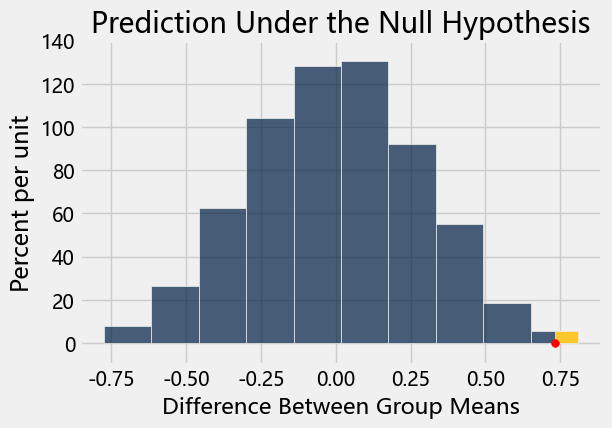

In [46]:
Table().with_column('Difference Between Group Means', differences).hist(left_end = observed_difference)
plots.ylim(-0.1, 1.4)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference: ', observed_difference)

In [47]:
empirical_p = np.count_nonzero(differences >= observed_difference) / repetitions
print('Empirical P-value: ', empirical_p)

Empirical P-value:  0.0022
